In [1]:
import nltk 

In [2]:
nltk.set_proxy('http://ptx.proxy.corp.sopra:8080')

In [3]:
#nltk.download_shell()

In [4]:
messages = [line.rstrip() for line in open('smsspamcollection/SMSSpamCollection')]
print(len(messages))

5574


In [5]:
messages[0]

'ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [6]:
messages[50]

'ham\tWhat you thinked about me. First time you saw me in class.'

In [7]:
for mess_no,message in enumerate(messages[:10]):
    print(mess_no, message)
    print('\n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. Claim cod

In [8]:
messages[0] #\t indicates that it is a tab separation (csv file)

'ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [9]:
import pandas as pd

In [10]:
messages= pd.read_csv('smsspamcollection/SMSSpamCollection', sep='\t',names=['label','message'])

In [11]:
messages.head()

label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...

In [12]:
messages.describe()

label                 message
count   5572                    5572
unique     2                    5169
top      ham  Sorry, I'll call later
freq    4825                      30

In [13]:
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [14]:
messages['length'] = messages['message'].apply(len)

In [15]:
messages.head()

label                                            message  length
0   ham  Go until jurong point, crazy.. Available only ...     111
1   ham                      Ok lar... Joking wif u oni...      29
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...     155
3   ham  U dun say so early hor... U c already then say...      49
4   ham  Nah I don't think he goes to usf, he lives aro...      61

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
%matplotlib inline

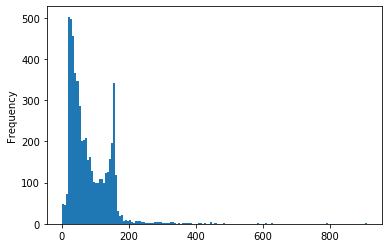

In [18]:
messages['length'].plot.hist(bins=150)

In [19]:
messages['length'].describe()

count    5572.000000
mean       80.490309
std        59.944527
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [20]:
messages[messages['length'] == 910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001070ACB2208>,
      dtype=object)

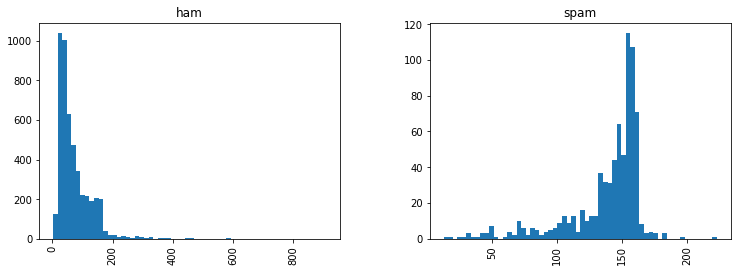

In [21]:
messages.hist(column='length', by='label',bins=60,figsize=(12,4))

In [22]:
import string

In [23]:
mess = 'sample message! Notice: it has punctuation.'

In [24]:
nopunc = [c for c in mess if c not in string.punctuation]

In [25]:
nopunc

['s',
 'a',
 'm',
 'p',
 'l',
 'e',
 ' ',
 'm',
 'e',
 's',
 's',
 'a',
 'g',
 'e',
 ' ',
 'N',
 'o',
 't',
 'i',
 'c',
 'e',
 ' ',
 'i',
 't',
 ' ',
 'h',
 'a',
 's',
 ' ',
 'p',
 'u',
 'n',
 'c',
 't',
 'u',
 'a',
 't',
 'i',
 'o',
 'n']

In [26]:
from nltk.corpus import stopwords

In [27]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [28]:
nopunc = ''.join(nopunc)

In [29]:
nopunc

'sample message Notice it has punctuation'

In [30]:
x=['a','b','c','d']

In [31]:
x

['a', 'b', 'c', 'd']

In [32]:
'+++'.join(x)

'a+++b+++c+++d'

In [33]:
nopunc.split()

['sample', 'message', 'Notice', 'it', 'has', 'punctuation']

In [34]:
clean_mess=[word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [35]:
clean_mess

['sample', 'message', 'Notice', 'punctuation']

In [36]:
def text_process(mess):
    """"
    1. remove punctuation
    2. remove stop words
    3. return list of clean text words
    """
    
    nopunc = [char for char in mess if char not in string.punctuation]
    
    nopunc = ''.join(nopunc)
    
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [37]:
messages['message'].head().apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

In [38]:
from sklearn.feature_extraction.text import CountVectorizer

In [39]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(messages['message'])

In [40]:
print(len(bow_transformer.vocabulary_))

11425


In [41]:
mess4 = messages['message'][3]

In [42]:
print(mess4)

U dun say so early hor... U c already then say...


In [43]:
bow4 = bow_transformer.transform([mess4])

In [44]:
print(bow4)

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2


In [45]:
print(bow4.shape)

(1, 11425)


In [46]:
bow_transformer.get_feature_names()[4068]

'U'

In [47]:
bow_transformer.get_feature_names()[9554]

'say'

In [48]:
messages_bow = bow_transformer.transform(messages['message']) 

In [49]:
print('Shape of Sparse Matrix: ', messages_bow.shape)

Shape of Sparse Matrix:  (5572, 11425)


In [50]:
messages_bow.nnz #amount of non zeros occurences

50548

In [51]:
sparsity = (100.0 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1]))
print('sparsity: {}'.format(round(sparsity)))

sparsity: 0


In [52]:
sparsity = (100.0 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1]))
print('sparsity: {}'.format(sparsity))

sparsity: 0.07940295412668218


In [53]:
from sklearn.feature_extraction.text import TfidfTransformer

In [54]:
tfidf_transformer = TfidfTransformer().fit(messages_bow)

In [55]:
tfidf4 = tfidf_transformer.transform(bow4)

In [56]:
print(tfidf4)

  (0, 9554)	0.5385626262927564
  (0, 7186)	0.4389365653379857
  (0, 6222)	0.3187216892949149
  (0, 6204)	0.29953799723697416
  (0, 5261)	0.29729957405868723
  (0, 4629)	0.26619801906087187
  (0, 4068)	0.40832589933384067


In [57]:
tfidf_transformer.idf_[bow_transformer.vocabulary_['university']]

8.527076498901426

In [58]:
tfidf_transformer.idf_[bow_transformer.vocabulary_['u']]

3.2800524267409408

In [59]:
messages_tfidf = tfidf_transformer.transform(messages_bow)

In [60]:
from sklearn.naive_bayes import MultinomialNB

In [61]:
spam_detect_model = MultinomialNB().fit(messages_tfidf, messages['label'])

In [63]:
spam_detect_model.predict(tfidf4)[0]

'ham'

In [64]:
messages['label'][3]

'ham'

In [65]:
all_pred = spam_detect_model.predict(messages_tfidf)

In [66]:
all_pred

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype='<U4')

In [67]:
from sklearn.model_selection import train_test_split

In [68]:
msg_train,msg_test,label_train,labal_test = train_test_split(messages['message'], messages['label'], test_size=0.3)

In [69]:
msg_train

4340                   Just got outta class gonna go gym.
2415                             O was not into fps then.
4522              Hi good mornin.. Thanku wish u d same..
156                          Aaooooright are you at work?
3532                 Prepare to be pounded every night...
3289    Someone U know has asked our dating service 2 ...
2550    Yup but not studying surfing lor. I'm in e laz...
686                        Have you finished work yet? :)
4102    GSOH? Good with SPAM the ladies?U could b a ma...
5417             Nope. I just forgot. Will show next week
191     Are you unique enough? Find out from 30th Augu...
4918    This is the 2nd time we have tried 2 contact u...
1906    There're some people by mu, I'm at the table b...
261                                                   Yup
1000            Aight will do, thanks again for comin out
3636    It's not that you make me cry. It's just that ...
2962    I'm doing da intro covers energy trends n pros...
2349          

In [71]:
from sklearn.pipeline import Pipeline

In [72]:
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),
    ('tfidf', TfidfTransformer()),
    ('classifier', MultinomialNB())
])

In [73]:
pipeline.fit(msg_train,label_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x0000010704C41D08>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [75]:
predictions = pipeline.predict(msg_test)

In [76]:
from sklearn.metrics import classification_report

In [78]:
print(classification_report(labal_test,predictions))

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1445
        spam       1.00      0.74      0.85       227

    accuracy                           0.96      1672
   macro avg       0.98      0.87      0.91      1672
weighted avg       0.97      0.96      0.96      1672

